In [1]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

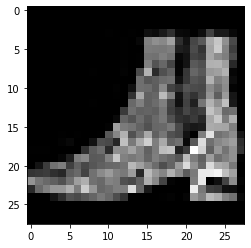

In [3]:
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

SUB_SIZE = 10000

# For the sake of time don't work with the entire dataset.
x_train = x_train[:SUB_SIZE]
y_train = x_train[:SUB_SIZE]

# Flatten the data.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

plt.imshow(x_train[random.randint(0, SUB_SIZE)].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# How many noise dimensions our generator should take in
NOISE_DIM = 100

# Define the generator here.
# The generator should have the following layers.
# Fully connected from # noise dimensions to 256
# LeakyReLU
# Fully connected from 256 to 512
# LeakyReLU
# Fully connected from 512 to 1024
# LeakyReLU
# Fully connected from 1024 to 784 (28*28)
# tanh (To normalize our output from -1 to 1)

def generator():
    pass

In [ ]:
# Define the discriminator here.
# Should have the following layers
# Fully connected from 784 (28*28) to 1024
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 1024 to 512
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 512 to 256
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 256 to 1
# sigmoid (to get our probability)

def discriminator():
    pass

In [ ]:
def combine(generator, discriminator):
    pass

In [ ]:
# Compile the discriminator, generator, and full GAN. 

# Use this optimizer for each of the models
opt = Adam(lr=.0002, beta_1=0.5)

In [ ]:
# Helper function to display sample from the network
def disp_sample(g):
    noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
    generated_images = g.predict(noise, verbose=0)
    show_im = generated_images[0]
    show_im = (show_im + 1) / 2.0
    show_im = show_im.reshape(28, 28)
    plt.imshow(show_im, cmap='gray')
    plt.show()

In [ ]:
batch_size = 128

for epoch in range(100):
    print('Epoch #%d' % epoch)
    
    # Generate an image and display it.
    disp_sample(g)
    
    num_batches = int(x_train.shape[0] / batch_size)
    print('Number batches %i' % num_batches)
    for i in range(num_batches):
        # A training iteration
        
        # Generate noise.
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
        
        # Generate images from the noise using the generator.
        generated_images = g.predict(noise)
        
        # Grab the image batch for this iteration. 
        real_images = x_train[i * batch_size: (i+1) * batch_size]
        
        # Contains the real and fake images.
        X = np.concatenate([generated_images, real_images])
        
        # Labels if the sample is real (1) or not real (0). 
        y = np.concatenate([np.zeros(generated_images.shape[0]), np.ones(real_images.shape[0])])

        # Train the discriminator using the generated images and the real images.
        d.trainable = True
        d_loss = d.train_on_batch(X, y)
        d.trainable = False
        
        # Generate more noise to feed into the full gan network to train the generative portion. 
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))

        # Get the g_loss
        g_loss = gd.train_on_batch(noise, np.ones(noise.shape[0]))
        
        print('%i(%i/%i) D: %.4f, G: %.4f' % (epoch, i, num_batches, d_loss, g_loss))